## CNN-based Algorithm for Handwritten Digit Detector

In [18]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input  # Add Input here
from tensorflow.keras.utils import to_categorical

In [19]:
df = pd.read_csv('Dataset/Train.csv')
print("Shape of train_data:", df.shape)


X = df.iloc[:, 1:]  
y = df.iloc[:, 0]   

print('Shape after seperating features: ', X.shape)

Shape of train_data: (42000, 785)
Shape after seperating features:  (42000, 784)


#### Data Pre-processing

In [20]:
if not isinstance(X, pd.DataFrame):
    X = pd.DataFrame(X)
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)  
X = X.values / 255.0
X = X.reshape(-1, 28, 28, 1)
print("Shape after reshaping:", X.shape)

Shape after reshaping: (42000, 28, 28, 1)


In [21]:
# One-hto encoding
y = to_categorical(y, num_classes=10)
print("Shape of y after one-hot encoding:", y.shape)

Shape of y after one-hot encoding: (42000, 10)


#### Splitting the dataset

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training data shape:", X_train.shape)

Training data shape: (33600, 28, 28, 1)


In [23]:
# MODEL
model = Sequential([
    Input(shape=(28, 28, 1)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9090 - loss: 0.3097 - val_accuracy: 0.9475 - val_loss: 0.1779
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9604 - loss: 0.1324 - val_accuracy: 0.9575 - val_loss: 0.1413
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9718 - loss: 0.0906 - val_accuracy: 0.9630 - val_loss: 0.1176
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9783 - loss: 0.0694 - val_accuracy: 0.9669 - val_loss: 0.1056
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9835 - loss: 0.0515 - val_accuracy: 0.9699 - val_loss: 0.0996
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9878 - loss: 0.0394 - val_accuracy: 0.9705 - val_loss: 0.1103
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9886 - loss: 0.0343 - val_accuracy: 0.9714 - val_loss: 0.0998
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9922 - loss: 0.0255 - 

#### Model Evaluation

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - accuracy: 0.9708 - loss: 0.1258
Validation Accuracy: 97.08%


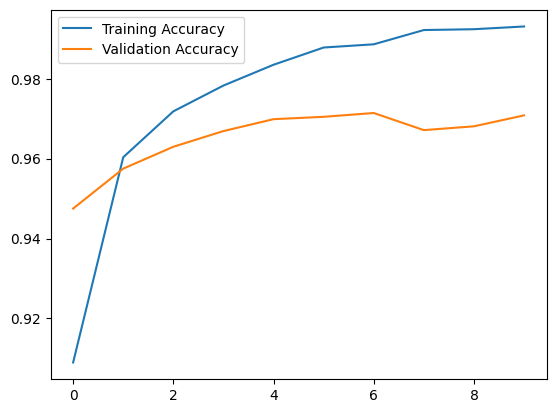

In [ ]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
# plt.axis('off')
plt.show()

#### Predictions

175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step


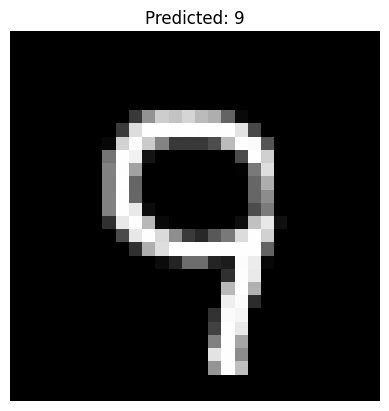

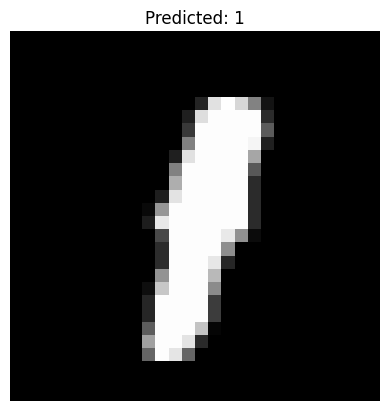

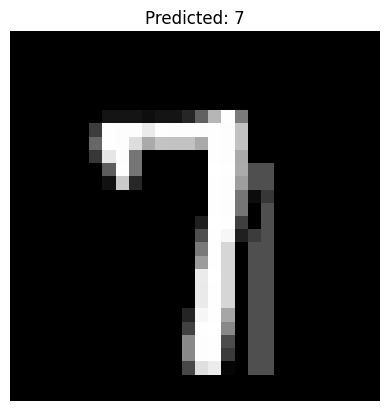

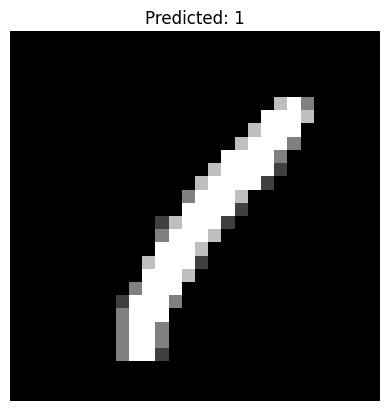

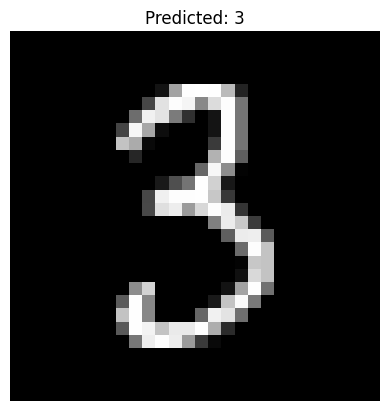

In [35]:
test_data = pd.read_csv('test digits/test.csv')
X_test = test_data.values / 255.0
X_test = X_test.reshape(-1, 28, 28, 1)
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis('off')
    plt.show()